# 1 Sources de données : manipulation

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer


def getColumnsList(df):
    return df.columns.tolist()

def getNaNIndex(df):
    df_null=df.isnull().unstack()
    return df_null[df_null]
    


def transformDataSet(name):

    """ Fonctions qui transforme un jeu de donnée"""
    #Importation du csv
    df=pd.read_csv(name, sep=",")
    
    
    encoder=LabelEncoder()
    #Transformation des valeurs catégorielles
    
    
    for col in ['contrat_de_travail','etat_civile','Solvable']:
        df[col]=encoder.fit_transform(df[col])
        
    #Suppression des NaN    
    imptr=SimpleImputer(missing_values=np.NaN, strategy='mean')
    for col in  df.drop("ID_NOM",axis=1).columns:
        
        imptr.fit(df[col].values.reshape(-1,1))
        df[col]=imptr.transform(df[col].values.reshape(-1,1))[0:,0]
    
    #Création des jeux de données
    train_set = df.sample(frac=0.75, random_state=0)
    test_set = df.drop(train_set.index)

    

    df[['Niv_Etude_Bac','age','Salaire','dette_anterieure','enfant_a_Charge']]=pd.DataFrame(StandardScaler().fit_transform(df[['Niv_Etude_Bac','age','Salaire','dette_anterieure','enfant_a_Charge']]))
    
    print(df)


transformDataSet('credit_immo.csv')

           0         1         2         3         4         5         6  \
0   0.584778  0.699645 -0.169300 -0.159400 -0.342231  0.679366  1.243540   
1   1.336635 -0.777383 -0.169300 -0.613929 -0.458469  0.679366 -0.331611   
2  -0.543008  1.568485 -0.169300 -0.733541  1.219175 -1.471960 -1.119186   
3   0.960706 -1.211803 -1.241532 -1.355528 -0.515720  0.679366 -0.331611   
4  -0.543008 -0.342963 -1.241532 -0.781386 -0.385603 -1.471960 -0.331611   
5  -0.543008  0.352109  1.975164 -0.159400 -0.472348  0.679366 -1.119186   
6  -0.918937 -0.690499 -0.169300  0.319051 -0.385603 -1.471960 -1.119186   
7  -1.670794 -1.124919  1.975164 -0.685696 -0.298859 -1.471960 -1.119186   
8   0.000000 -0.951151 -0.169300  0.031981 -0.515720  0.679366 -0.331611   
9   0.584778  0.004573 -0.169300  0.118102 -0.428976  0.679366  0.455965   
10  0.208849  0.265225 -0.169300  0.797503 -0.450662  0.679366  1.243540   
11 -0.543008  0.091457 -1.241532 -0.829232 -0.168741 -1.471960  2.031115   
12 -1.670794

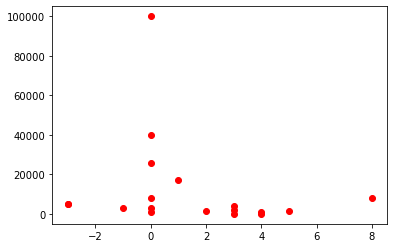

In [101]:
import matplotlib.pyplot as plt
df=pd.read_csv('credit_immo.csv', sep=",")
plt.plot(df["Niv_Etude_Bac"],df["dette_anterieure"],"ro")

# 4) Visualisation des données

In [7]:
montant_temps=pd.read_csv('Montant_Temps.csv',sep=',')
X=montant_temps.iloc[:,:1].values

Y=montant_temps.iloc[:,-1].values.reshape(-1,1)


Text(0.5, 0, 'Temps')

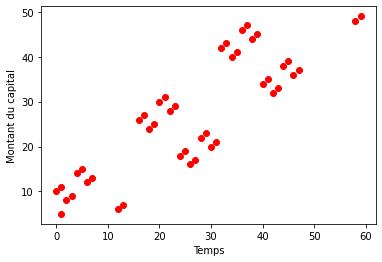

In [9]:


plt.plot(X,Y,"ro")
plt.ylabel("Montant du capital")
plt.xlabel("Temps")plt.plot

# 5) Analyse des données


In [18]:
tendance_centrale=pd.read_csv("tendance_centrale.csv")
X=tendance_centrale.iloc[:,1:2].values
Y=tendance_centrale.iloc[:,2:3].values


           Nom  Age  Rating
0      ANATOLE   55    4.53
1     Vincent    59    3.54
2      Brenda    55    3.98
3    Philippe    53    5.59
4      Michel    30    3.50
5     Tillier    59    4.90
6   Blanchard    53    3.80
7        perez   34    3.78
8        théo    40    5.98
9     cyprien    30    4.80
10   manuella    53    4.30
11   LEGGERET    49    3.95
12       perez   34    3.78
13    sestre     40    5.98
14      Fazal    30    4.80
15      Donald   53    4.30
16     Estelle   49    3.95
[[4.53]
 [3.54]
 [3.98]
 [5.59]
 [3.5 ]
 [4.9 ]
 [3.8 ]
 [3.78]
 [5.98]
 [4.8 ]
 [4.3 ]
 [3.95]
 [3.78]
 [5.98]
 [4.8 ]
 [4.3 ]
 [3.95]]


In [26]:
#Calcul moyenne
print("Moyennes :\n")
print(tendance_centrale.mean())

#Calcul médiance
#Calcul médiance
print("\nMédianes :\n")
print(tendance_centrale.median())

#Calcul mode
print("\nMode :\n")
print(tendance_centrale["Age"].mode())
print(tendance_centrale["Rating"].mode())

Moyennes :

Age       45.647059
Rating     4.438824
dtype: float64

Médianes :

Age       49.0
Rating     4.3
dtype: float64

Mode :

0    53
dtype: int64
0    3.78
1    3.95
2    4.30
3    4.80
4    5.98
dtype: float64


## Variance

In [30]:
#Calcul de la variance de l'age :
#Calcul médiance
print("\nVariance age :\n")
print(tendance_centrale["Age"].var())

print("\nVariance Rating  :\n")
print(tendance_centrale["Rating"].var())


Variance age :

114.99264705882352

Variance Rating  :

0.640623529411765


# Analyse de corrélations

In [47]:
iris=pd.read_csv("iris.csv",sep=",")
print(iris.groupby("espèce").mean())
iris_setosa=iris.loc[iris["espèce"]=="setosa"]
iris_versicolor=iris.loc[iris["espèce"]=="versicolor"]
iris_virginica=iris.loc[iris["espèce"]=="virginica"]

            longueur_sepal  largeur_sepal  longueur_petal  largeur_petal
espèce                                                                  
setosa               5.006          3.428           1.462          0.246
versicolor           5.936          2.770           4.260          1.326
virginica            6.588          2.974           5.552          2.026


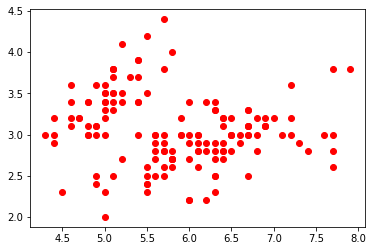

In [67]:
plt.plot(iris["longueur_sepal"],iris["largeur_sepal"],"ro")

On a ici un exemple de relation linéaire positive pour 

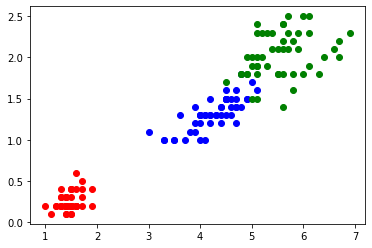

In [61]:
plt.plot(iris_setosa["longueur_petal"],iris_setosa["largeur_petal"],"ro",color="red")
plt.plot(iris_versicolor["longueur_petal"],iris_versicolor["largeur_petal"],"ro",color="blue")
plt.plot(iris_virginica["longueur_petal"],iris_virginica["largeur_petal"],"ro",color="green")

## Coeff de correlation de pearson

In [62]:
iris.corr()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
longueur_sepal,1.000000,-0.117570,0.871754,0.817941
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126
longueur_petal,0.871754,-0.428440,1.000000,0.962865
largeur_petal,0.817941,-0.366126,0.962865,1.000000
